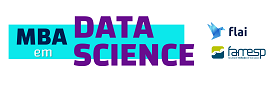

# **Consumo de Energia Elétrica no Brasil**

## **Entendendo o contexto**

### **Consumo de Energia Elétrica**

A Energia Elétrica já faz parte do nosso dia-a-dia em tudo que fazemos, seja para tomar banho quente através de um chuveiro que esquenta a água através de resistências elétricas, seja para assar um bolo no forno elétrico, ou para esquentar a comida no microondas, ou simplesmente para carregar a bateria do celular. A indústria também utiliza a energia elétrica em seus equipamentos. Bom, poderiamos citar centenas de usos da Energia Elétrica.

No Brasil, a ANEEL - Agência Nacional de Energia Elétrica, autarquia do Governo Federal no  Brasil é o orgão de regulação do setor elétrico no Brasil.

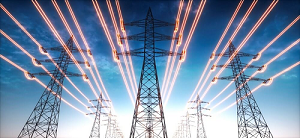

### **O Objetivo da Aula**

Compreender o consumo de energia elétrica no Brasil através de visualização de dados.

### **O dataset**

Estes conjuntos de dados, oriundos do Ministério de Minas e Energia do Brasil, foram estruturados de forma que cada instância é um Estado do Brasil em determinado mês de algum ano, e os atributos são:

- **ano** Ano; 
- **mes** Mês;
- **sigla_uf** Sigla da Unidade da Federação;
- **tipo_consumo** Tipo de Consumo ('Total', 'Cativo', 'Residencial', 'Industrial', 'Comercial','Outros' );
- **numero_consumidores** Número de Consumidores;
- **consumo** Consumo (MWh);

Os conjunto de dados está disponível em um repositório no GitHub que pode ser acessado através do link:

- https://raw.githubusercontent.com/jonates/opendata/master/consumo_energia_eletrica/consumo_energia_eletrica.csv;


### **A Biblioteca Altair**

matplotlib é uma biblioteca python para visualização de dados. 

Para maiores informações da Altair, consulte a documentação no endereço a seguir:

- https://altair-viz.github.io/

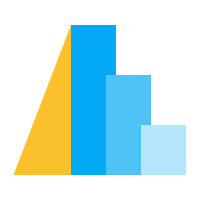

## **Hands-on**

1. **Carregar dados**;
2. **Entender a estrutura dos dados**;
3. **Transformar dados**;
4. **Elaboração do Gráfico**.

### **Carregando o conjunto de dados**

In [17]:
# Fazendo download do conjunto de dados do consumo de energia elétrica
!wget --verbose --show-progress --no-check-certificate https://raw.githubusercontent.com/jonates/opendata/master/consumo_energia_eletrica/consumo_energia_eletrica.csv

--2022-05-09 05:35:41--  https://raw.githubusercontent.com/jonates/opendata/master/consumo_energia_eletrica/consumo_energia_eletrica.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1098358 (1.0M) [text/plain]
Saving to: ‘consumo_energia_eletrica.csv.1’

consumo_energia_ele 100%[===================>]   1.05M  --.-KB/s    in 0.06s   

2022-05-09 05:35:42 (16.3 MB/s) - ‘consumo_energia_eletrica.csv.1’ saved [1098358/1098358]



In [18]:
# Importando o Pandas
import pandas as pd

In [20]:
# Importando o conjunto de dados do consumo de energia elétrica
energia = pd.read_csv(
    filepath_or_buffer = '/content/consumo_energia_eletrica.csv', 
    sep=',',
    decimal='.'
)

In [ ]:
# Espiando o conjunto de dados
energia.head(5)

### **Espiando a estrutura dos dados**

In [22]:
# Informacoes gerais do conjunto de dados de consumo de energia elétrica
energia.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34992 entries, 0 to 34991
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ano                  34992 non-null  int64  
 1   mes                  34992 non-null  int64  
 2   sigla_uf             34992 non-null  object 
 3   tipo_consumo         34992 non-null  object 
 4   numero_consumidores  22575 non-null  float64
 5   consumo              34992 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.6+ MB


### **Análise do consumo de energia elétrica no Brasil**

In [23]:
# Importando as bibliotecas necessarias
import altair as alt

#### **Consumo de energia elétrica no Brasil por Ano**

In [24]:
# Calculando o consumo de energia elétrica no Brasil por ano
consumo_BR_por_ano = energia[['ano','consumo']] \
  .groupby('ano', as_index = False)\
  .sum()

# Espiando o resultado
consumo_BR_por_ano.head()

,ano,consumo
0,2004,9.467633e+08
1,2005,9.557357e+08
2,2006,9.748749e+08
3,2007,1.027501e+09
4,2008,1.066155e+09


In [25]:
# Fazendo gráfico de área
alt.Chart(data = consumo_BR_por_ano) \
 .mark_area(
    line={'color':'darkblue'},
    color=alt.Gradient(
        gradient='linear',
        stops=[alt.GradientStop(color='white', offset=0),
               alt.GradientStop(color='darkblue', offset=1)],
        x1=1,
        x2=1,
        y1=1,
        y2=0
    )
).encode(
    alt.X('ano:T'),
    alt.Y('consumo:Q')
).properties(width=600, height=400, title = 'Consumo de Energia Elétrica, Brasil.')

alt.Chart(...)

#### **Consumo de energia residencial 2020 x número de consumidores**

In [26]:
# Filtrando somente consumo residencial em janeiro de 2020
consumo_residencial_por_uf_jan2020 = energia.query('(ano==2020) & (mes==1) & (tipo_consumo=="Residencial")')

In [27]:
# Elaborando o diagrama de dispersão
alt.Chart(data = consumo_residencial_por_uf_jan2020)\
  .mark_circle(size=60)\
  .encode(
    x='numero_consumidores',
    y='consumo',
    color='sigla_uf',
    tooltip=['sigla_uf', 'numero_consumidores', 'consumo']
).properties(width=600, height=400).interactive()

alt.Chart(...)

#### **Consumo de energia por mês em 2020 por tipo de consumo**

In [28]:
# Filtrando consumo no ano de 2020 por mês, tipo de consumo
consumo_2020 = energia.query('(ano==2020) & (tipo_consumo != "Total")')
consumo_por_tipo_mes = consumo_2020[['mes','tipo_consumo','consumo']].groupby(['mes','tipo_consumo'], as_index = False).sum()
consumo_por_tipo_mes.head()

,mes,tipo_consumo,consumo
0,1,Cativo,2.722380e+07
1,1,Comercial,8.019694e+06
2,1,Industrial,1.352000e+07
3,1,Outros,6.805895e+06
4,1,Residencial,1.290851e+07


In [29]:
# Fazendo o gráfico de linhas
alt.Chart(data =consumo_por_tipo_mes)\
  .mark_line() \
  .encode(
    x='mes:O',
    y=alt.Y(
        shorthand = 'consumo:Q',
        scale=alt.Scale(type="log")  # Here the scale is applied
    ),
    color  = alt.Color('tipo_consumo', scale=alt.Scale(scheme='set1'))
  ) \
  .properties(
      width=600, 
      height=400, 
      title = 'Consumo de Energia no Brasil por mês e tipo de consumo.'
  )

alt.Chart(...)

#### **Consumo de energia por uf em Dezembro de 2021**

In [30]:
# Filtrando somente consumo total em Dezembro de 2021
consumo_total_por_uf_dez2021 = energia.query('(ano==2021) & (mes==12) & (tipo_consumo == "Total")')


In [31]:
# Definindo as barras
bars = alt.Chart(
    data=consumo_total_por_uf_dez2021,
    height=600, 
    title = 'Consumo de Energia Elétrica por UF do Brasil, Dez/2021.'
  ).mark_bar()\
  .encode(
    x='consumo:Q',
    y=alt.Y(
        shorthand = "sigla_uf:O", 
        sort='-x', 
        axis = alt.Axis(title = 'Unidade da Federação')
    )    
)

# Definindo os rótulos
text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
  ).encode(text='consumo:Q')

# Fazendo o gráfico de barras
(bars + text)\
  .configure_mark(opacity=0.8,color='purple')

alt.LayerChart(...)

#### **Consumo de energia por uf e tipo em Dezembro de 2021**

In [ ]:
# Filtrando consumo em Dezembro de 2021 por tipo de consumo e UF
consumo_por_uf_dez2021 = energia.query('(ano==2021) & (mes==12) & (tipo_consumo != "Total")')
consumo_por_uf_dez2021

In [32]:
# Fazendo gráfico de barras empilhadas
alt.Chart(data = consumo_por_uf_dez2021)\
  .mark_bar()\
  .encode(
    x=alt.X('consumo', stack="normalize"),
    y='sigla_uf',
    color='tipo_consumo',
    tooltip=['sigla_uf', 'tipo_consumo', 'consumo']
).properties(width=600, height=400).interactive()

alt.Chart(...)

#### **Saiba mais**

Para mais informações sobre outros tipos de gráficos no Altair, bem como para customizações acesse a documentação https://altair-viz.github.io/

### **Faça Você mesmo**

Baseado nos conhecimentos desta aula, construa gráficos com a biblioteca Altair, para visualizar o comportamento dos preços de abertura do Bitcoins, e comparar o volume de ações de Bitcoin e Etereum no último dia do ano de 2021.

O conjunto de dados está disponível para download no link:
- https://github.com/jonates/opendata/blob/master/criptomoedas/criptomoedas.csv